In [53]:
import pandas as pd
from zipfile import ZipFile
import os
import re
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [54]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.head()

,id,text,date_modified,date_journal,address,lat,lon,mood,timezone,favourite,weather,photos,tags,no_punc
0,1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...
1,1439198245820-3fda14add91e3f20,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises mehw u so effortlessly...
2,1439198461993-3fefd6db711e0342,Me \n\n\nWrite fantasies/inaginary dream world...,2017-10-08 12:24:49,2015-08-10 04:21:01,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['me'],Me Write fantasiesinaginary dream world storie...
3,1439575035515-3feb330512548cbd,"The dwarfs garden\n\nHe had a garden ,that lit...",2016-04-29 05:23:44,2015-08-14 12:57:15,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['published'],The dwarfs garden He had a garden that little ...
4,1440393646546-3fdb2bc02b9f8020,Brigadier Suraj singh\n\nMy name is brigadier ...,2017-08-18 05:27:31,2015-08-24 00:20:46,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['script'],Brigadier Suraj singh My name is brigadier sur...


In [55]:
timedata = pd.DataFrame(datadf[['date_journal','id']])

In [56]:
timedata=timedata.set_index('id')

In [57]:
timedata['year'] = pd.DatetimeIndex(timedata['date_journal']).year
timedata['month'] = pd.DatetimeIndex(timedata['date_journal']).month
timedata['day'] = pd.DatetimeIndex(timedata['date_journal']).day
timedata['hour'] = pd.DatetimeIndex(timedata['date_journal']).hour
timedata['minute'] = pd.DatetimeIndex(timedata['date_journal']).minute
timedata['dayofweek'] = pd.DatetimeIndex(timedata['date_journal']).dayofweek

In [58]:
# timedata.drop(columns='level_0')
timedata

,date_journal,year,month,day,hour,minute,dayofweek
id,,,,,,,
1439137473084-3fc756cc3f8d6404,2015-08-09 11:24:33,2015,8,9,11,24,6
1439198245820-3fda14add91e3f20,2015-08-10 04:17:25,2015,8,10,4,17,0
1439198461993-3fefd6db711e0342,2015-08-10 04:21:01,2015,8,10,4,21,0
1439575035515-3feb330512548cbd,2015-08-14 12:57:15,2015,8,14,12,57,4
1440393646546-3fdb2bc02b9f8020,2015-08-24 00:20:46,2015,8,24,0,20,0
...,...,...,...,...,...,...,...
1589599203833-3fccc2487ff20d88,2020-05-15 22:20:04,2020,5,15,22,20,4
1589599469199-3fc8b4cdb6d4b0d4,2020-05-15 22:24:29,2020,5,15,22,24,4
1589603430128-3fdcc9774f183676,2020-05-15 23:30:30,2020,5,15,23,30,4


In [59]:
timedata.to_csv('All Data/Raw Journey Data/TimeDataUntil16May2020.csv')

In [60]:
monthly = timedata.groupby('month').count()
monthly

,date_journal,year,day,hour,minute,dayofweek
month,,,,,,
1,224,224,224,224,224,224
2,235,235,235,235,235,235
3,246,246,246,246,246,246
4,318,318,318,318,318,318
5,256,256,256,256,256,256
6,179,179,179,179,179,179
7,171,171,171,171,171,171
8,197,197,197,197,197,197
9,168,168,168,168,168,168


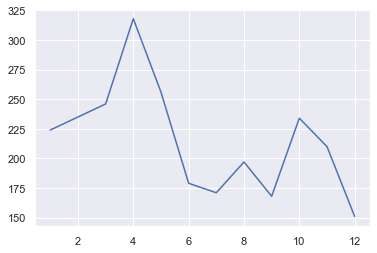

In [61]:
plt.plot(monthly.index,monthly['year'])

In [62]:
daily = timedata.groupby('day').count()
daily

,date_journal,year,month,hour,minute,dayofweek
day,,,,,,
1,70,70,70,70,70,70
2,80,80,80,80,80,80
3,75,75,75,75,75,75
4,103,103,103,103,103,103
5,98,98,98,98,98,98
6,85,85,85,85,85,85
7,82,82,82,82,82,82
8,100,100,100,100,100,100
9,83,83,83,83,83,83


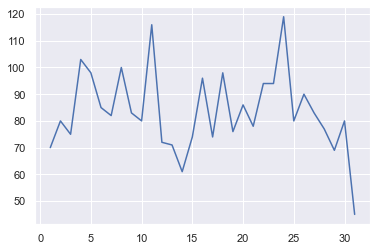

In [63]:
plt.plot(daily.index,daily['year'])

In [64]:
week = timedata.groupby('dayofweek').count()
week

,date_journal,year,month,day,hour,minute
dayofweek,,,,,,
0,396,396,396,396,396,396
1,363,363,363,363,363,363
2,375,375,375,375,375,375
3,370,370,370,370,370,370
4,388,388,388,388,388,388
5,377,377,377,377,377,377
6,320,320,320,320,320,320


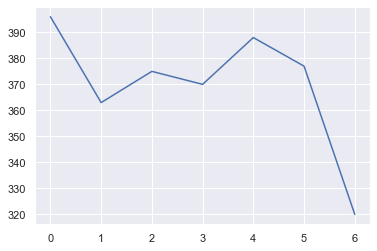

In [65]:
plt.plot(week.index,week['year'])

In [66]:
hourly = timedata.groupby('hour').count()
hourly

,date_journal,year,month,day,minute,dayofweek
hour,,,,,,
0,108,108,108,108,108,108
1,73,73,73,73,73,73
2,59,59,59,59,59,59
3,69,69,69,69,69,69
4,52,52,52,52,52,52
5,56,56,56,56,56,56
6,78,78,78,78,78,78
7,106,106,106,106,106,106
8,123,123,123,123,123,123


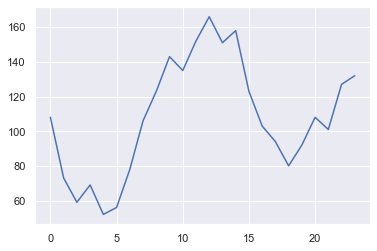

In [67]:
plt.plot(hourly.index,hourly['year'])

In [68]:
datadf['address'].value_counts()

10, Vishrantwadi Airport Rd, Adarsh Colony, Dhanori, Pune, Maharashtra 411032, India                             199
Third Avenue North Residence Hall, New York, NY 10003, USA                                                       180
408 Cedar Crest Dr, Coppell, TX 75019, USA                                                                       104
Lane Number 10, Adarsh Colony, Tingre Nagar, Pune, Maharashtra 411032, India                                      96
400 Broome St, New York, NY 10013, USA                                                                            77
                                                                                                                ... 
Tompkins Square Park, E 10th St, New York, NY 10009, USA                                                           1
Road no.10, Vidyanagar, Vishrantwadi Airport Rd, Adarsh Colony, Tingre Nagar, Pune, Maharashtra 411032, India      1
814, Law College Road                                           

In [69]:
punct_re='[^\w\s]'
regex= '<.*?>'
datadf['no_punc'] = datadf['text'].str.replace(regex, " ")
datadf['no_punc'] = datadf['text'].str.replace(punct_re, " ")

In [70]:
test = datadf['text'][2]
test

'Me \n\n\nWrite fantasies/inaginary dream world stories\nMagical world\nLearn to play drums\nKeep falling\nLove clouds\nLove sun\nLearn dance well/hrithik roshan\nLearn to sing\nGive an unforgettable performance\nHave opals n topazez n uranium\nHave someone like silver/looks like atleast\nWrite the story "evryones gt a story"\nOlive yellow green-athletic gold-deep blue grey-cool grey\nAn elder daughter named Anoushka and a younger son\nBE ABLE TO FLY\nSmooth.fast.small.round(my type)\nShe has now become a part of my fantasy world..\nA fantasy i retreat to..\nLike a kiss from her in times of stress would just give me an escape..\nLove to make people smile\nHow things work..how the world works\nI have lost control over myself become careless and lazy need to be strict with myself fruit water skipping early sleep less phone more studies concentration grow\ni am all bout art art art art..nothing but art..I was made for art..music drama drawing evrythin\nGirls which are pretty mature for th

In [71]:
regex= '<.*?>'
test = re.sub(regex, '', test)
test

'Me \n\n\nWrite fantasies/inaginary dream world stories\nMagical world\nLearn to play drums\nKeep falling\nLove clouds\nLove sun\nLearn dance well/hrithik roshan\nLearn to sing\nGive an unforgettable performance\nHave opals n topazez n uranium\nHave someone like silver/looks like atleast\nWrite the story "evryones gt a story"\nOlive yellow green-athletic gold-deep blue grey-cool grey\nAn elder daughter named Anoushka and a younger son\nBE ABLE TO FLY\nSmooth.fast.small.round(my type)\nShe has now become a part of my fantasy world..\nA fantasy i retreat to..\nLike a kiss from her in times of stress would just give me an escape..\nLove to make people smile\nHow things work..how the world works\nI have lost control over myself become careless and lazy need to be strict with myself fruit water skipping early sleep less phone more studies concentration grow\ni am all bout art art art art..nothing but art..I was made for art..music drama drawing evrythin\nGirls which are pretty mature for th

In [72]:
punct_re='[^\w\s]'
test = re.sub(punct_re, '', test)
test

'Me \n\n\nWrite fantasiesinaginary dream world stories\nMagical world\nLearn to play drums\nKeep falling\nLove clouds\nLove sun\nLearn dance wellhrithik roshan\nLearn to sing\nGive an unforgettable performance\nHave opals n topazez n uranium\nHave someone like silverlooks like atleast\nWrite the story evryones gt a story\nOlive yellow greenathletic golddeep blue greycool grey\nAn elder daughter named Anoushka and a younger son\nBE ABLE TO FLY\nSmoothfastsmallroundmy type\nShe has now become a part of my fantasy world\nA fantasy i retreat to\nLike a kiss from her in times of stress would just give me an escape\nLove to make people smile\nHow things workhow the world works\nI have lost control over myself become careless and lazy need to be strict with myself fruit water skipping early sleep less phone more studies concentration grow\ni am all bout art art art artnothing but artI was made for artmusic drama drawing evrythin\nGirls which are pretty mature for their agequiet and pretty nan

In [73]:
newline_re='\\n'
test = re.sub(newline_re, '', test)
newline_re='nbsp'
test = re.sub(newline_re, ' ', test)
test

'Me Write fantasiesinaginary dream world storiesMagical worldLearn to play drumsKeep fallingLove cloudsLove sunLearn dance wellhrithik roshanLearn to singGive an unforgettable performanceHave opals n topazez n uraniumHave someone like silverlooks like atleastWrite the story evryones gt a storyOlive yellow greenathletic golddeep blue greycool greyAn elder daughter named Anoushka and a younger sonBE ABLE TO FLYSmoothfastsmallroundmy typeShe has now become a part of my fantasy worldA fantasy i retreat toLike a kiss from her in times of stress would just give me an escapeLove to make people smileHow things workhow the world worksI have lost control over myself become careless and lazy need to be strict with myself fruit water skipping early sleep less phone more studies concentration growi am all bout art art art artnothing but artI was made for artmusic drama drawing evrythinGirls which are pretty mature for their agequiet and pretty nandini hemangini iram if sadall u need is some good mu

In [74]:
for i in range(len(datadf['text'])):
    regex= '<.*?>'
    datadf['no_punc'][i] = re.sub(regex, '', (datadf['text'][i]))
    punct_re='[^\w\s]'
    datadf['no_punc'][i] = re.sub(punct_re, '', (datadf['no_punc'][i]))
    newline_re='\\n'
    datadf['no_punc'][i] = re.sub(newline_re, ' ', (datadf['no_punc'][i]))
    newline_re2='nbsp'
    datadf['no_punc'][i] = re.sub(newline_re2, ' ', (datadf['no_punc'][i]))
    datadf['no_punc'][i] = re.sub('\s+', ' ', datadf['no_punc'][i]).strip()

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

TypeError: expected string or bytes-like object

In [ ]:
datadf

In [ ]:
tidy_format = datadf.no_punc.str.split(expand=True).stack().to_frame().reset_index(level=1)
tidy_format['num']=tidy_format['level_1']
tidy_format['word']=tidy_format[0]
tidy_format = tidy_format.drop(columns=[0,'level_1'])
tidy_format.head()

In [ ]:
lex = pd.read_csv('All Data/SentimentAnalysisVaderLexicon.csv')
lex = lex.set_index('token')

In [ ]:
polarities = tidy_format.merge(lex, left_on='word', right_on='token', copy=False, right_index=True)
# .groupby(tidy_format.index).agg({'polarity':'sum'})

In [ ]:
polarities.head()

In [ ]:
polarities = polarities.groupby(polarities.index).sum().drop(columns='num')

In [ ]:
pol_text = polarities.merge(datadf['no_punc'], left_on=polarities.index, right_on=datadf['no_punc'].index).rename(columns={'key_0':'id'})

In [ ]:
pol_text.sort_values('polarity').head()

In [ ]:
timedata.head()

In [ ]:
pol_text = pol_text.merge(timedata['month'], left_on='id', right_on=timedata['month'].index)
pol_text

In [ ]:
pol_text.to_csv('All Data/Raw Journey Data/PolarizedDataUntil16May2020.csv')

In [ ]:
monthly_sent = pol_text.groupby('month').agg({'polarity':'sum'})
monthly_sent

In [ ]:
plt.plot(monthly_sent)

In [ ]:
monthly_sent = pol_text.groupby('month').agg({'polarity':'mean'})
print(monthly_sent)
plt.plot(monthly_sent)